# Energy suppliers on Trustpilot - Visualizations File 1

Author: Stefanie Arlt

There are two data sets available, both containing information scraped from the Trustpilot web site:
 - 1: Trustpilot Energy supplier rankings in Germany (https://de.trustpilot.com/categories/electric_utility_company)
 - 2: Trustpilot Comments and feedback to energy suppliers in Germany (see comment column in import data for links)

This notebooks focuses on the first file with the aim to explore the data, analyse it and visualize pertinent key facts from the data set.


## Data Preparation

### Import

In [5]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# import data of data file from webscraping 
data = pd.read_csv("ener_supplier_rankings_clean_final.csv")
data.head()

,supplier,city,country,cat,score,votes,comment
0,Octopus Energy Germany,München,Deutschland,Ökostromanbieter Energieanbieter Stromversorgu...,4.8,8042,https://de.trustpilot.com/review/octopusenergy.de
1,Ostrom,Berlin,Deutschland,Energieanbieter Ökostromanbieter Stromversorgu...,4.8,1598,https://de.trustpilot.com/review/ostrom.de
2,Rabot Charge,Hamburg,Deutschland,Energieversorger Energieanbieter Stromversorgu...,4.3,174,https://de.trustpilot.com/review/rabot-charge.de
3,MONTANA Group,Grünwald,Deutschland,Energieanbieter Mineralölunternehmen Kraftstof...,4.0,3146,https://de.trustpilot.com/review/montana-energ...
4,E.ON Energie Deutschland GmbH,München,Deutschland,Energieversorger Stromversorgungsunternehmen Ö...,3.7,13223,https://de.trustpilot.com/review/eon.de


In [7]:
#data

### Data Cleaning

In [9]:
# basic information
data.info() # #there are missing values, data types look okay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   supplier  37 non-null     object 
 1   city      31 non-null     object 
 2   country   31 non-null     object 
 3   cat       37 non-null     object 
 4   score     37 non-null     float64
 5   votes     37 non-null     int64  
 6   comment   37 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.2+ KB


In [10]:
#check value counts
data.nunique().sort_values() 

## identify redundant columns
# column "country" seems redundant, all entries are "Deutschland", to be dropped after clarifying missing values
# column "comment" is only link for comments page, not needed for visualization

country      1
city        17
score       23
cat         28
votes       33
supplier    37
comment     37
dtype: int64

In [11]:
#check for duplicates
data.duplicated().sum() # there are no duplicates

0

In [12]:
# check if there are missing values
data.isna().sum().sum()

12

In [13]:
# check columns with missing values
data.isna().sum() # columns 'city' and 'country'

supplier    0
city        6
country     6
cat         0
score       0
votes       0
comment     0
dtype: int64

In [14]:
# verify which lines have missing values
data.loc[data.isnull().any(axis=1)]

,supplier,city,country,cat,score,votes,comment
10,Vattenfall Europe Sales GmbH,NaN,NaN,Stromversorgungsunternehmen Gasversorgungsunte...,4.4,10204,https://de.trustpilot.com/review/www.vattenfal...
19,Gas-und-Stromvergleich.de,NaN,NaN,Stromversorgungsunternehmen Gasversorgungsunte...,0.0,0,https://de.trustpilot.com/review/www.gas-und-s...
22,CHONO MEDIA,NaN,NaN,Reiseanbieter Telekommunikationsanbieter Strom...,3.2,39,https://de.trustpilot.com/review/www.chono.de
29,Oekostrom,NaN,NaN,Gasversorgungsunternehmen Stromversorgungsunte...,1.7,44,https://de.trustpilot.com/review/oekostrom.com
33,EWE,NaN,NaN,Stromversorgungsunternehmen,1.2,2228,https://de.trustpilot.com/review/www.ewe.de
34,OPTUM GmbH,NaN,NaN,Gasversorgungsunternehmen Ökostromanbieter Str...,0.0,0,https://de.trustpilot.com/review/optum-eba.de


In [15]:
## research of NaN

## 0 votes --> can be deleted after relevance clarification
# line 19: Gas-und-Stromvergleich.de --> 0 Votes, internet search resulted in no valid company, just leading to price comparison portal
# line 34: OPTUM GmbH - 'Heilbronn' - 'Deutschland' --> 0 Votes, company only offers energy brokerage service, i.e. no energy supplier

## others --> found valid company information via internet research
# line 10: Vattenfall Europe Sales GmbH - 'Berlin' - 'Deutschland'
# line 22: CHONO MEDIA - 'Dresden' - 'Deutschland' (Feb 2022 insolvent, Inhaber Jonny Rönnefahrt)
# line 29: Oekostrom - 'Duesseldorf' - 'Deutschland' (Marke von Naturstrom AG)
# line 33: EWE - 'Oldenburg' - 'Deutschland'


In [16]:
# drop lines 19 and 34 where 0 votes
data = data.drop([19, 34])


In [17]:
# check for other lines with 0 votes
data.loc[data["votes"] == 0]

,supplier,city,country,cat,score,votes,comment
35,Mein Stromgas,Dorsten,Deutschland,Stromversorgungsunternehmen,0.0,0,https://de.trustpilot.com/review/mein-stromgas.de
36,Netzberatung,Kassel,Deutschland,Energieanbieter Stromversorgungsunternehmen Ve...,0.0,0,https://de.trustpilot.com/review/netzberatung....


In [18]:
# drop lines 35 and 36 where 0 votes
data = data.drop([35, 36])

In [19]:
# fill in missing city information

# line 10: Vattenfall Europe Sales GmbH - 'Berlin' - 'Deutschland'
data.loc[10, "city"] = "Berlin"

# line 22: CHONO MEDIA - 'Dresden' - 'Deutschland' (Feb 2022 insolvent, Inhaber Jonny Rönnefahrt)
data.loc[22, "city"] = "Dresden"

# line 29: Oekostrom - 'Düsseldorf' - 'Deutschland' (Marke von Naturstrom AG)
data.loc[29, "city"] = "Düsseldorf"

# line 33: EWE - 'Oldenburg' - 'Deutschland'
data.loc[33, "city"] = "Oldenburg"

In [20]:
data.loc[data.isnull().any(axis=1)]

,supplier,city,country,cat,score,votes,comment
10,Vattenfall Europe Sales GmbH,Berlin,NaN,Stromversorgungsunternehmen Gasversorgungsunte...,4.4,10204,https://de.trustpilot.com/review/www.vattenfal...
22,CHONO MEDIA,Dresden,NaN,Reiseanbieter Telekommunikationsanbieter Strom...,3.2,39,https://de.trustpilot.com/review/www.chono.de
29,Oekostrom,Düsseldorf,NaN,Gasversorgungsunternehmen Stromversorgungsunte...,1.7,44,https://de.trustpilot.com/review/oekostrom.com
33,EWE,Oldenburg,NaN,Stromversorgungsunternehmen,1.2,2228,https://de.trustpilot.com/review/www.ewe.de


In [21]:
# remove obsolete columns
data = data.drop(['country', 'comment'], axis= 1)

# rename column votes to avoid misunderstanding
data = data.rename(columns={'votes': 'num_votes'}) 

data.head()

,supplier,city,cat,score,num_votes
0,Octopus Energy Germany,München,Ökostromanbieter Energieanbieter Stromversorgu...,4.8,8042
1,Ostrom,Berlin,Energieanbieter Ökostromanbieter Stromversorgu...,4.8,1598
2,Rabot Charge,Hamburg,Energieversorger Energieanbieter Stromversorgu...,4.3,174
3,MONTANA Group,Grünwald,Energieanbieter Mineralölunternehmen Kraftstof...,4.0,3146
4,E.ON Energie Deutschland GmbH,München,Energieversorger Stromversorgungsunternehmen Ö...,3.7,13223


In [22]:
# check if there are still missing values
data.isna().sum().sum() # no missing values

0

In [23]:
#reset index
data.reset_index(drop=True, inplace=True)

In [24]:
# check for special chars
print("Special chars in column 'supplier':", data['supplier'][data['supplier'].str.contains(".*[@_!#$%^&*()<>?/\|}{~:].*", regex= True)].unique())
print("Special chars in column 'city':", data['city'][data['city'].str.contains(".*[@_!#$%^&*()<>?/\|}{~:].*", regex= True)].unique())

Special chars in column 'supplier': []
Special chars in column 'city': []


In [25]:
#check numerical values
data.describe() # there are no companies with 0 votes

,score,num_votes
count,33.000000,33.000000
mean,3.303030,1663.212121
std,1.073978,3333.433185
min,1.200000,3.000000
25%,2.700000,49.000000
50%,3.500000,130.000000
75%,4.000000,1598.000000
max,4.800000,13223.000000


#### Save cleaned data file to csv

In [27]:
# Saving the cleaned data frame in a csv file
#data.to_csv("ener_supplier_rankings_clean_no-null.csv", index=False)

### Data Modification

In Germany, the power supplier, aka "Energieversorger" "Energieanbieter", "Energieversorgungsunternehmen" or "Stromversorgungsunternehmen" is responsible for the delivery of energy. All these are synonyms in German language.

The Trustpilot search was for 'Stromversorgungsunternehmen', but some companies also offer additional services and are listed in more than one category. It would be interesting to see what other services are offered:
 - 'Ökostromanbieter', i.e. eco power supplier
 - 'Gasversorgungsunternehmen', i.e. gas supplier
 - 'Solarenergieunternehmen', i.e solar energy installations


In [30]:
df1 = data

#### Export categories to text for a comprehensive list of unique categories

In [32]:
## Check categories in column cat

# collect all entries in a text
text = ""
for comment in df1['cat'] : 
    text += comment + ' '

#text

In [33]:
# convert text to list
text_to_list = text.split()
#text_to_list

# issues:
# 'Energieanlagen', 'und', '-lösungen' --> remove 'und', '-lösungen'; replace 'Energieanlagen' with 'Energieanlagen und -lösungen'
# 'Anbieter', 'von', 'Elektronikbauteilen' --> remove 'von', 'Elektronikbauteilen'; replace 'Anbieter' with 'Anbieter von Elektronikbauteilen'
# 'Technischer', 'Kundendienst' --> remove 'Kundendienst'; replace 'Technischer' with 'Technischer Kundendienst'
# 'Telefon-', 'und', 'Internetdienst' --> remove 'Internetdienst', replace 'Telefon-' with 'Telefon- und Internetdienst'



In [34]:
#remove all unwanted words
unwanted = {'und', '-lösungen', 'von', 'Elektronikbauteilen', 'Kundendienst', 'Internetdienst'}
text_to_list = [e for e in text_to_list if e not in unwanted]

In [35]:
#replace
text_to_list = [w.replace('Energieanlagen', 'Energieanlagen und -lösungen') for w in text_to_list]
text_to_list = [w.replace('Anbieter', 'Anbieter von Elektronikbauteilen') for w in text_to_list]
text_to_list = [w.replace('Technischer', 'Technischer Kundendienst') for w in text_to_list]
text_to_list = [w.replace('Telefon-', 'Telefon- und Internetdienst') for w in text_to_list]

#text_to_list

In [36]:
# get unique values for categories
cat_list = []
for item in text_to_list: 
    if item not in cat_list: 
        cat_list.append(item) 

cat_list

['Ökostromanbieter',
 'Energieanbieter',
 'Stromversorgungsunternehmen',
 'Energieversorger',
 'Gasversorgungsunternehmen',
 'Solarenergieunternehmen',
 'Mineralölunternehmen',
 'Kraftstofflieferant',
 'Solartechnikanbieter',
 'Wasserversorgungsunternehmen',
 'Anbieter von Elektronikbauteilen',
 'Technischer Kundendienst',
 'Elektronikunternehmen',
 'Energieanlagen und -lösungen',
 'Heizungsanlagenanbieter',
 'Telekommunikationsanbieter',
 'Internetanbieter',
 'Telefon- und Internetdienst',
 'Stadtwerke',
 'Reiseanbieter',
 'Online-Marktplatz',
 'Wärmeenergie-Unternehmen']

#### Analysis of categories to separate 'cat' column in separate columns

1. Synonyms for energy supplier in general should all be labeled in one category: 
'energy supplier' for "Energieversorger", "Energieanbieter", "Energieversorgungsunternehmen", "Stromversorgungsunternehmen", 'Stadtwerke'

2. specialiced power labels: 
 - 'eco energy' for 'Ökostromanbieter'
 - 'solar energy' for 'Solarenergieunternehmen'
 - 'heat flow' for 'Wärmeenergie-Unternehmen'

3. diversification labels: 
 - 'gas supplier' for 'Gasversorgungsunternehmen'
 - 'fuel supplier' for 'Mineralölunternehmen', 'Kraftstofflieferant',
 - 'water supplier' for 'Wasserversorgungsunternehmen'
 - 'telecommunications provider' for  'Telekommunikationsanbieter', 'Internetanbieter', 'Telefon- und Internetdienst'
 - 'energy solutions' for 'Energieanlagen und -lösungen', 'Solartechnikanbieter', 'Heizungsanlagenanbieter', 'Anbieter von Elektronikbauteilen', 'Technischer Kundendienst', 'Elektronikunternehmen'
 - 'virtual' for 'Reiseanbieter', 'Online-Marktplatz'

In [39]:
## new columns for data (short names, no spaces)
col_add = ['energy', 'eco', 'solar', 'heat', 'gas', 'fuel', 'water', 'telco', 'energy_solutions', 'virtual']

for newcol in col_add:
    df1[newcol]= 0

#check df
df1.head()

,supplier,city,cat,score,num_votes,energy,eco,solar,heat,gas,fuel,water,telco,energy_solutions,virtual
0,Octopus Energy Germany,München,Ökostromanbieter Energieanbieter Stromversorgu...,4.8,8042,0,0,0,0,0,0,0,0,0,0
1,Ostrom,Berlin,Energieanbieter Ökostromanbieter Stromversorgu...,4.8,1598,0,0,0,0,0,0,0,0,0,0
2,Rabot Charge,Hamburg,Energieversorger Energieanbieter Stromversorgu...,4.3,174,0,0,0,0,0,0,0,0,0,0
3,MONTANA Group,Grünwald,Energieanbieter Mineralölunternehmen Kraftstof...,4.0,3146,0,0,0,0,0,0,0,0,0,0
4,E.ON Energie Deutschland GmbH,München,Energieversorger Stromversorgungsunternehmen Ö...,3.7,13223,0,0,0,0,0,0,0,0,0,0


In [40]:
# add entry to respective column when keyword present in "cat" column

data.loc[data["cat"].str.contains("Energieanbieter"), "energy"] = 1
data.loc[data["cat"].str.contains("Stromversorgungsunternehmen"), "energy"] = 1
data.loc[data["cat"].str.contains("Energieversorger"), "energy"] = 1
data.loc[data["cat"].str.contains("Energieversorgungsunternehmen"), "energy"] = 1
data.loc[data["cat"].str.contains("Stadtwerke"), "energy"] = 1
data.loc[data["cat"].str.contains("Ökostromanbieter"), "eco"] = 1
data.loc[data["cat"].str.contains("Solarenergieunternehmen"), "solar"] = 1
data.loc[data["cat"].str.contains("Wärmeenergie-Unternehmen"), "heat"] = 1
data.loc[data["cat"].str.contains("Gasversorgungsunternehmen"), "gas"] = 1
data.loc[data["cat"].str.contains("Mineralölunternehmen"), "fuel"] = 1
data.loc[data["cat"].str.contains("Kraftstofflieferant"), "fuel"] = 1
data.loc[data["cat"].str.contains("Wasserversorgungsunternehmen"), "water"] = 1
data.loc[data["cat"].str.contains("Telekommunikationsanbieter"), "telco"] = 1
data.loc[data["cat"].str.contains("Internetanbieter"), "telco"] = 1
data.loc[data["cat"].str.contains("Telefon- und Internetdienst"), "telco"] = 1
data.loc[data["cat"].str.contains("Energieanlagen und -lösungen"), "energy_solutions"] = 1
data.loc[data["cat"].str.contains("Solartechnikanbieter"), "energy_solutions"] = 1
data.loc[data["cat"].str.contains("Heizungsanlagenanbieter"), "energy_solutions"] = 1
data.loc[data["cat"].str.contains("Anbieter von Elektronikbauteilen"), "energy_solutions"] = 1
data.loc[data["cat"].str.contains("Elektronikunternehmen"), "energy_solutions"] = 1
data.loc[data["cat"].str.contains("Technischer Kundendienst"), "energy_solutions"] = 1
data.loc[data["cat"].str.contains("Reiseanbieter"), "virtual"] = 1
data.loc[data["cat"].str.contains("Online-Marktplatz"), "virtual"] = 1

In [41]:
#check df
df1.head()

,supplier,city,cat,score,num_votes,energy,eco,solar,heat,gas,fuel,water,telco,energy_solutions,virtual
0,Octopus Energy Germany,München,Ökostromanbieter Energieanbieter Stromversorgu...,4.8,8042,1,1,0,0,1,0,0,0,0,0
1,Ostrom,Berlin,Energieanbieter Ökostromanbieter Stromversorgu...,4.8,1598,1,1,1,0,0,0,0,0,0,0
2,Rabot Charge,Hamburg,Energieversorger Energieanbieter Stromversorgu...,4.3,174,1,1,0,0,0,0,0,0,0,0
3,MONTANA Group,Grünwald,Energieanbieter Mineralölunternehmen Kraftstof...,4.0,3146,1,1,0,0,1,1,0,0,0,0
4,E.ON Energie Deutschland GmbH,München,Energieversorger Stromversorgungsunternehmen Ö...,3.7,13223,1,1,0,0,1,0,0,0,1,0


In [42]:
#remove 'cat' column as content is migrated to new columns
df1 = df1.drop(['cat'], axis= 1)


In [43]:
neworder = ["supplier", "city", "energy", "eco", "solar", "heat", "gas", "fuel", "water", "telco", "energy_solutions", "virtual", "num_votes", "score"]
df1 = df1.reindex(columns=neworder)

In [44]:
df1

,supplier,city,energy,eco,solar,heat,gas,fuel,water,telco,energy_solutions,virtual,num_votes,score
0,Octopus Energy Germany,München,1,1,0,0,1,0,0,0,0,0,8042,4.8
1,Ostrom,Berlin,1,1,1,0,0,0,0,0,0,0,1598,4.8
2,Rabot Charge,Hamburg,1,1,0,0,0,0,0,0,0,0,174,4.3
3,MONTANA Group,Grünwald,1,1,0,0,1,1,0,0,0,0,3146,4.0
4,E.ON Energie Deutschland GmbH,München,1,1,0,0,1,0,0,0,1,0,13223,3.7
5,Grünwelt Energie,Kaarst,1,0,0,0,0,0,0,0,0,0,1964,3.6
6,RheinEnergie,Köln,1,1,0,0,1,0,1,0,0,0,528,3.4
7,badenova,Freiburg im Breisgau,1,1,0,0,1,0,0,0,0,0,241,2.7
8,pricewise.de,Heidelberg,1,0,0,0,1,0,0,0,0,0,119,4.8
9,DFM-Select GmbH,Metzingen,1,0,0,0,0,0,0,0,1,0,22,4.6


In [45]:
#number of unique values per column in complete df
df1.nunique().sort_values()


energy               1
eco                  2
solar                2
heat                 2
gas                  2
fuel                 2
water                2
telco                2
energy_solutions     2
virtual              2
city                18
score               22
num_votes           32
supplier            33
dtype: int64

In [46]:
# drop energy_supplier column because every supplier is listed here
df1 = df1.drop('energy', axis=1)

#### Investigate and streamline the new columns

1. Power categories offered by the supplier: 'eco'
 - 'eco' if only 'eco' is offered besides default 'energy'
 - 'energy' = default if no other categories are offered

Background:
 - 'solar and eco' combination are not needed, as eco energy is wind and solar power, therefore 'solar' only is not present, and only once 'solar' is present (USP?).
 - 'heat' is only present once (USP?) as not the energy mix is important here but the lowered taxes for electricity that is used for heat your living space. 'eco' and 'heat' as a consequence are present once. See also clarification below.

Clarification Heat Flow

What is heat flow / energy?
Heat flow is the electricity that is used to heat your living space. This can be for a heat pump or infrared heater, for example.
Household electricity, on the other hand, is used to operate your household appliances. These include, for example, kitchen appliances, televisions or the washing machine.

Why is heat flow less expensive than household electricity?
Two factors determine the price difference:
 - Lower taxes are generally charged for heat flow. These include, for example, the concession fee or network usage fees.
 - In order to avoid load peaks in the power grid, the heat flow can be interrupted by the energy supplier. Heat flow is therefore offered more cheaply.

Please note: District heating is not heat flow.
District heating refers to the supply of hot water and heating to buildings via an underground pipeline network. District heating can be generated from various fuels and heat sources.

In [50]:
## Power categories offered by the supplier: 'eco'
# Keep the 'eco' column, and remove 'solar' and 'heat' columns.
df1 = df1.drop(['solar', 'heat'], axis=1)

2. Lateral diversification: supplier is offering other raw materials: column 'gas'
 - 'gas' if gas is offered besides energy, which is the most common.
 - 'none' if no gas or other energy sources are offered.

Background:
 - Traditionally, many energy suppliers have also provided gas to their customers, but with the gas crisis from the last year (Ukraine war) more and more suppliers stop delivering.
 - Other raw materials are fuel and water, which is only offered once each and only if gas is also provided as a customer product. Therefore these cases will be neglected here and added as a key note in the written summary.


In [52]:
## Lateral diversification:
# Keep the 'gas' column, and remove 'fuel' and 'water' columns.
df1 = df1.drop(['fuel', 'water'], axis=1)

3. Vertical diversification: supplier is offering additional services: column 'services'
 - 'telco' for telecommunication services, which is fairly common as older power suppliers also used to own the network, now outsourced to daughter companies
 - 'energy_system' for energy solutions like photo voltaic installations and their technical parts, which is quite often a hybrid product line.
 - 'none' if no vertical diversification

Background:
 - 'telco_solutions' is not present as a combination.
 - 'virtual' is only present once, and will be subsumed to 'telco', with the appropriate key note information.



In [54]:
### idea 1: shared columns ==> abandoned, as we lose numerical information
# create new column 'services'
#df1['services'] = 'none'

# add entry to 'services' column when keyword present in source column
#  add 1 for 'telco' telecommunication services
#df1.loc[df1["telco"] == 1, "services"] = 'telco'

# add 2 for 'energy_solutions', i.e. energy system construction or related services
#df1.loc[df1["energy_solutions"] == 1, "services"] = 'energy_systems'
# remove obsolete columns 'telco' and 'energy_solutions'
#df1 = df1.drop(['telco', 'energy_solutions'], axis=1)

# rearrange column order
#neworder2 = ["supplier", "city", "eco", "gas", "services", "votes", "score"]
#df1 = df1.reindex(columns=neworder2)


In [55]:
### idea 2: keep 3 columns with binary information
# Keep the 'telco' and 'energy_solutions' column, and remove 'virtual' column
df1 = df1.drop('virtual', axis=1)


In [56]:
data

,supplier,city,cat,score,num_votes,energy,eco,solar,heat,gas,fuel,water,telco,energy_solutions,virtual
0,Octopus Energy Germany,München,Ökostromanbieter Energieanbieter Stromversorgu...,4.8,8042,1,1,0,0,1,0,0,0,0,0
1,Ostrom,Berlin,Energieanbieter Ökostromanbieter Stromversorgu...,4.8,1598,1,1,1,0,0,0,0,0,0,0
2,Rabot Charge,Hamburg,Energieversorger Energieanbieter Stromversorgu...,4.3,174,1,1,0,0,0,0,0,0,0,0
3,MONTANA Group,Grünwald,Energieanbieter Mineralölunternehmen Kraftstof...,4.0,3146,1,1,0,0,1,1,0,0,0,0
4,E.ON Energie Deutschland GmbH,München,Energieversorger Stromversorgungsunternehmen Ö...,3.7,13223,1,1,0,0,1,0,0,0,1,0
5,Grünwelt Energie,Kaarst,Stromversorgungsunternehmen,3.6,1964,1,0,0,0,0,0,0,0,0,0
6,RheinEnergie,Köln,Ökostromanbieter Energieanbieter Gasversorgung...,3.4,528,1,1,0,0,1,0,1,0,0,0
7,badenova,Freiburg im Breisgau,Stromversorgungsunternehmen Energieanbieter Ga...,2.7,241,1,1,0,0,1,0,0,0,0,0
8,pricewise.de,Heidelberg,Gasversorgungsunternehmen Stromversorgungsunte...,4.8,119,1,0,0,0,1,0,0,0,0,0
9,DFM-Select GmbH,Metzingen,Anbieter von Elektronikbauteilen Technischer K...,4.6,22,1,0,0,0,0,0,0,0,1,0


In [57]:
#check new data frame
df1.info() # all data types correct, no NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   supplier          33 non-null     object 
 1   city              33 non-null     object 
 2   eco               33 non-null     int64  
 3   gas               33 non-null     int64  
 4   telco             33 non-null     int64  
 5   energy_solutions  33 non-null     int64  
 6   num_votes         33 non-null     int64  
 7   score             33 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.2+ KB


In [58]:
#check information on numerical values
df1.describe()

,eco,gas,telco,energy_solutions,num_votes,score
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.454545,0.515152,0.151515,0.121212,1663.212121,3.303030
std,0.505650,0.507519,0.364110,0.331434,3333.433185,1.073978
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.200000
25%,0.000000,0.000000,0.000000,0.000000,49.000000,2.700000
50%,0.000000,1.000000,0.000000,0.000000,130.000000,3.500000
75%,1.000000,1.000000,0.000000,0.000000,1598.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,13223.000000,4.800000


#### Save modified data file to csv

In [60]:
# Saving the cleaned data frame in a csv file
#df1.to_csv("ener_supplier_rankings_clean_no-null.csv", index=False)

## Visualizations

Points of interest: score/stars - number of votes - number of categories (diversification) - investigation of overall distribution and possible correlation

### Correlation analysis data set 1 and p test


In [63]:
# select data
cor_data = df1.iloc[:,2:]

cor_data.head()

,eco,gas,telco,energy_solutions,num_votes,score
0,1,1,0,0,8042,4.8
1,1,0,0,0,1598,4.8
2,1,0,0,0,174,4.3
3,1,1,0,0,3146,4.0
4,1,1,0,1,13223,3.7


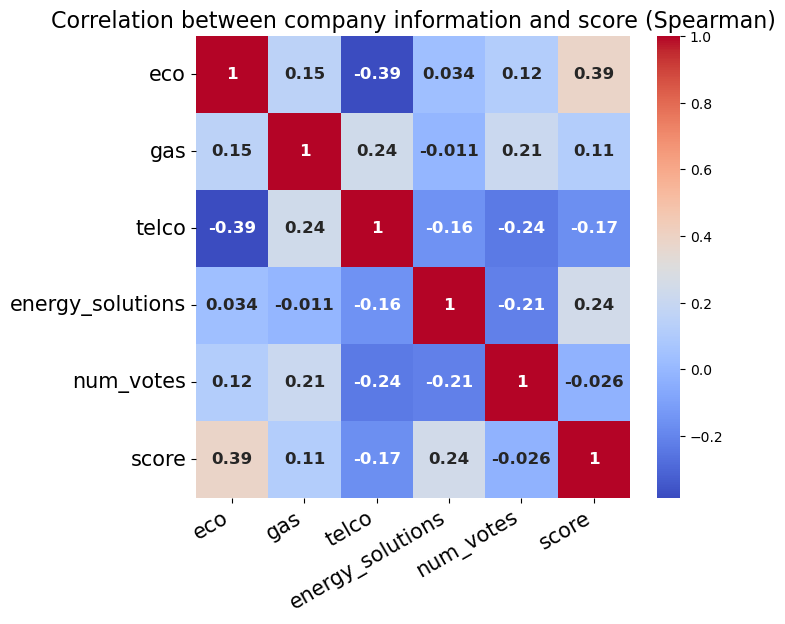

In [64]:
#Correlation between company information and number of stars/score (Spearman) --> non-linear relationship
cor = cor_data.corr(method = 'spearman')

#Heatmap
f, ax = plt.subplots(figsize = (7,6))
sns.heatmap(cor, annot= True, ax=ax, cmap= 'coolwarm', annot_kws={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Correlation between company information and score (Spearman)', fontsize= 16 )
plt.xticks(rotation= 30, ha='right')
plt.yticks(rotation = 0)
plt.xticks(fontsize= 15)
plt.yticks(fontsize=15)
plt.show();


# Interpretation:
# Red colors indicate a high positive correlation between the variables.
# Blue colors show a poor and even negative correlation correlation.

# Observation:
# Eco-friendly energy seems positively correlated to the rating score, also solar energy and the offering of energy solutions. 
# Heat flow shows highest negative correlation to the score. Diversification in gas and fuel supply is only mildly represented as positive.
# Votes and telco are positively correlated as well.

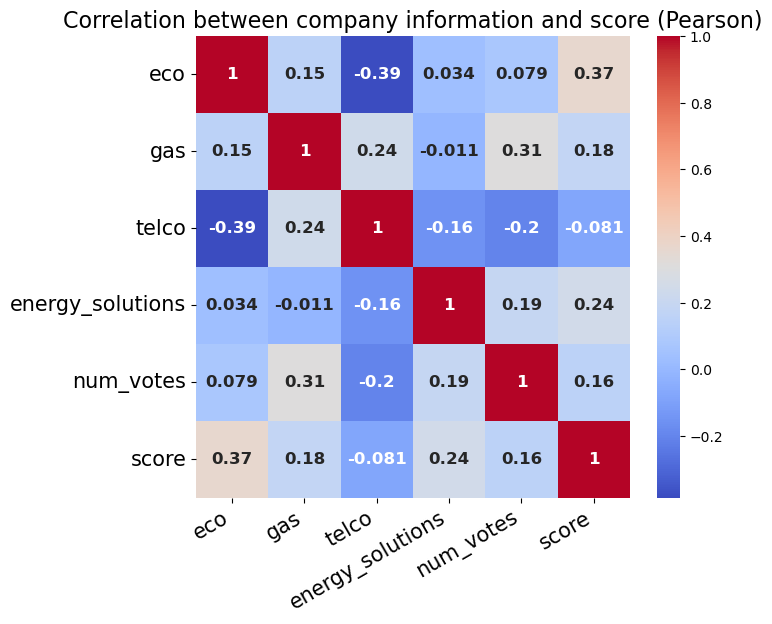

In [65]:
#Correlation between company information and number of stars/score (Pearson) --> linear relationship
cor = cor_data.corr(method = 'pearson')

#Heatmap
f, ax = plt.subplots(figsize = (7,6))
sns.heatmap(cor, annot= True, ax=ax, cmap= 'coolwarm', annot_kws={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Correlation between company information and score (Pearson)', fontsize= 16 )
plt.xticks(rotation= 30, ha='right')
plt.yticks(rotation = 0)
plt.xticks(fontsize= 15)
plt.yticks(fontsize=15)
plt.show();


# Interpretation:
# Red colors indicate a high positive correlation between the variables.
# Blue colors show a poor and even negative correlation correlation.

# Observation is overall similar to Spearman:
# Eco-friendly energy seems positively correlated to the rating score, also solar energy and the offering of energy solutions. 
# Heat flow shows highest negative correlation to the score. Diversification in gas and fuel supply is only mildly represented as positive.
# In Pearson, we can also see a negative correlation to telco, but votes seem slightly positively correlated.

# Let us check with the computation below for p-test.

In [66]:
# ### Pearson correlation test between two quantitative variables --> linear relationship
# ## The hypotheses :
# H0 : The variables votes and score are not correlated
# H1 : The variables are correlated

## The test :
from scipy.stats import pearsonr
pearson_r_votes = pearsonr(x= df1['num_votes'], y= df1['score'])

print("Pearson r p-value:", pearson_r_votes[1], " - coefficient:", pearson_r_votes[0])

# the p value is high and > 0.05, thus we reject H1 and we conclude H0, 
# it means that there is no correlation between the variables votes and score


Pearson r p-value: 0.38807983192674195  - coefficient: 0.1553213667912827


In [67]:
# ### Spearman correlation test between two quantitative variables --> non-linear relationship
# ## The hypotheses :
# H0 : The variables votes and score are not correlated
# H1 : The variables are correlated

## The test : 
from scipy.stats import spearmanr
spearman_r_votes = spearmanr(df1['num_votes'], df1['score'])

print("Spearman r p-value:", spearman_r_votes[1], " - coefficient:", spearman_r_votes[0])

# the p value is high and > 0.05, thus we reject H1 and we conclude H0, 
# it means that there is no correlation between the variables votes and score


Spearman r p-value: 0.8874859769454655  - coefficient: -0.02561315702468811



### Overview pairwise relationship and distributions

#### Pairplot over all features

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


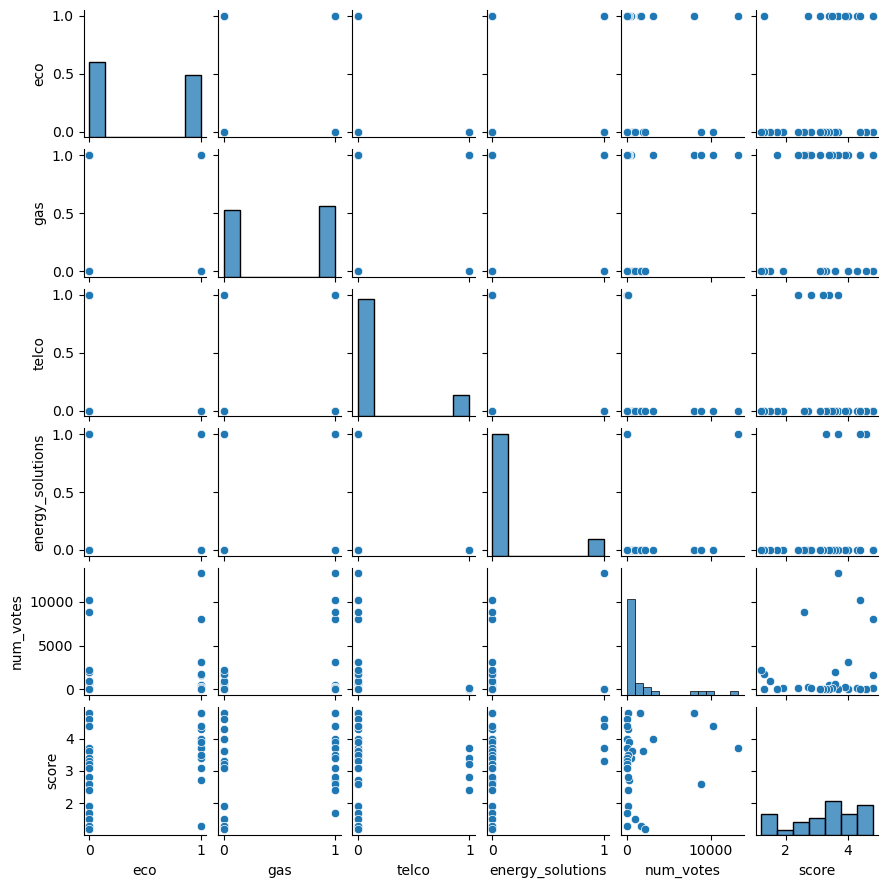

In [70]:
#data = df1
#plot pairwise relationship and distributions and histograms
sns.pairplot(df1, diag_kind="hist", height= 1.5);

#### Histogram and distribution number of votes and score

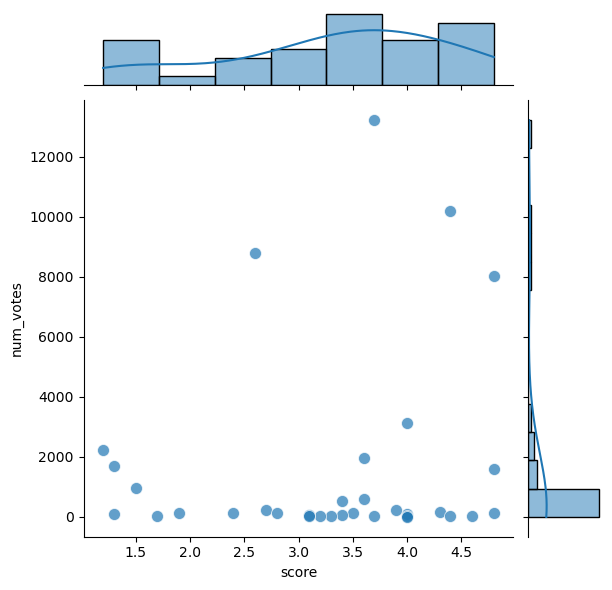

In [72]:
# plot score and num_votes
g = sns.JointGrid(data=df1, y="num_votes", x="score")
g.plot_joint(sns.scatterplot, s=75, alpha=.7)
g.plot_marginals(sns.histplot, kde=True);

Interpretation:
 - There is no correlation visible between categories, number of votes and score.
 - Distributions show consistently for all scores many suppliers with few numbers of votes. 
 - There are 4 suppliers with exceptionally high number of votes.

### Number of votes and rating of the energy suppliers
Data set 1

There are currently 33 rated energy suppliers on the Trustpilot website. As we have seen in the Pearson r test, the number of votes should not be a factor for a high or low ranking (score) of the suppliers.

#### Rating Score vs. Number of Votes

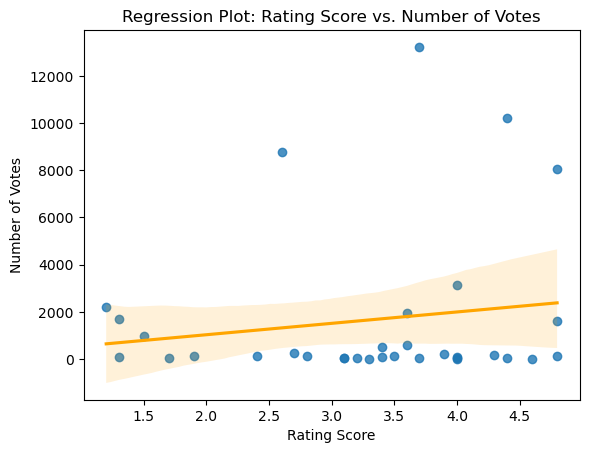

In [76]:
sns.regplot(x=df1.score, y=df1.num_votes, line_kws={'color': 'orange'},)
plt.xlabel('Rating Score')
plt.ylabel('Number of Votes')
plt.title('Regression Plot: Rating Score vs. Number of Votes')
plt.show()

Observation:
    
 - Only 4 suppliers have more than 6000 votes, while both high and low average scores are found among these suppliers. So there is no correlation visible here.
 - 24 out of 33 suppliers have less than 1000 votes. That is nearly 73% of all listed suppliers.


In [78]:
# check which suppliers have more than 6000 votes
df1.loc[df1["num_votes"] > 6000]


,supplier,city,eco,gas,telco,energy_solutions,num_votes,score
0,Octopus Energy Germany,München,1,1,0,0,8042,4.8
4,E.ON Energie Deutschland GmbH,München,1,1,0,1,13223,3.7
10,Vattenfall Europe Sales GmbH,Berlin,0,1,0,0,10204,4.4
25,eprimo GmbH,Neu-Isenburg,0,1,0,0,8786,2.6


In [79]:
# check how many suppliers have less than 1000 votes
len(df1.loc[df1["num_votes"] < 1000]) 


24

In [80]:
# percentage of suppliers with less than 1000 votes
len(df1.loc[df1["num_votes"] < 1000]) / len(data) * 100


72.72727272727273

Clearly the 4 suppliers with high vote count are exceptional. How does it look like for suppliers with less than 6000 votes?

#### Distribution of rating for suppliers with less than 6000 votes

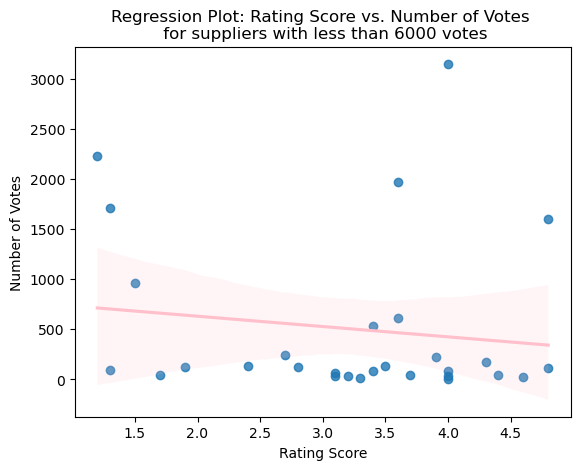

In [83]:
low_votes = df1.loc[df1["num_votes"] < 6000]

sns.regplot(x=low_votes.score, y=low_votes.num_votes, line_kws={'color': 'pink'},)
plt.xlabel('Rating Score')
plt.ylabel('Number of Votes')
plt.title('Regression Plot: Rating Score vs. Number of Votes \n for suppliers with less than 6000 votes')
plt.show()


Observation:

 - Although we see limited data points, we can observe a tendency of higher number of votes for low ranking and higher ranking, and less votes for medium scores.

 - An explanation might be that customers tend to express more feedback when they are exceptionally happy or exceptionally unhappy.

 - A Point against this is the history, some suppliers like Vattenfall have been in business very long. And the average score is changing over time: 
 - If a supplier has been exceptional 3 years ago and is performing significantly worse today, than the overall ranking is going down, although he has more votes.


We should investigate this more deeply with more data, and check the situation with the votes and their word count.

#### Distribution of scores

In [86]:
## categorize score
# add column with rounded score
ener_service = df1
ener_service['score_rounded'] = ener_service['score'].round(0)

In [87]:
# add column with log transformation for num_votes
# To transform to logarithms, we need positive values (if not normalize) = only positive values
ener_service['log_num_votes'] = np.log(ener_service['num_votes'])

#check
ener_service.head()


,supplier,city,eco,gas,telco,energy_solutions,num_votes,score,score_rounded,log_num_votes
0,Octopus Energy Germany,München,1,1,0,0,8042,4.8,5.0,8.992433
1,Ostrom,Berlin,1,0,0,0,1598,4.8,5.0,7.376508
2,Rabot Charge,Hamburg,1,0,0,0,174,4.3,4.0,5.159055
3,MONTANA Group,Grünwald,1,1,0,0,3146,4.0,4.0,8.053887
4,E.ON Energie Deutschland GmbH,München,1,1,0,1,13223,3.7,4.0,9.489713


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


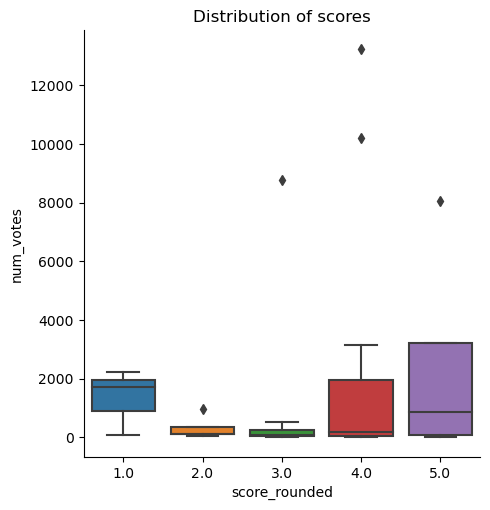

In [88]:
### plot with original number of votes
# data = ener_service,
# display the distribution of score on number of votes
sns.catplot(x= 'score_rounded', 
            y= 'num_votes', 
            kind= 'box', 
            # hue = 'eco', 
            #alpha = 0.7,
            data = ener_service
           )

plt.title('Distribution of scores')
plt.show()


Observation:

 - Although we see limited data points, we can observe a tendency of higher number of votes for low ranking and higher ranking, and less votes for medium scores (2 and 3).

 - We clearly can see 4 outliers with > 6000 votes: Octopus Engergy, E.ON, Vattenfall and Eprimo. 


#### Distribution with log transformation of number of votes

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


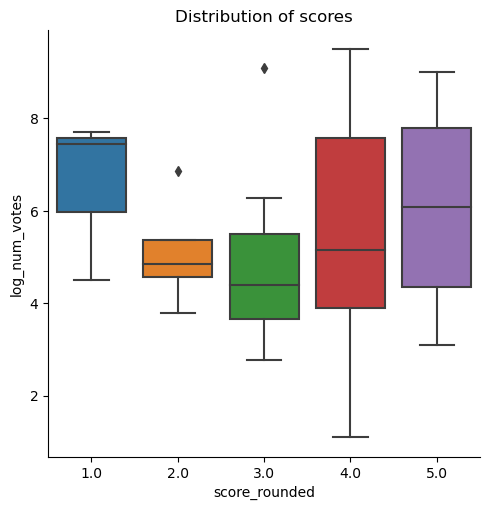

In [91]:
# data = ener_service,
# display the distribution of score on number of votes
sns.catplot(x= 'score_rounded', 
            y= 'log_num_votes', 
            kind= 'box', 
            # hue = 'eco', 
            #alpha = 0.7,
            data = ener_service
           )

plt.title('Distribution of scores')
plt.show()

Observation:

if we look at the distribution of scores and the number of votes vs. the rating score, we can see that most votes, we can see that for every rating, there are suppliers with low and high number of votes. Even if there are some extreme values for the middle scores, most supplier ratings are based on less than 500 votes.

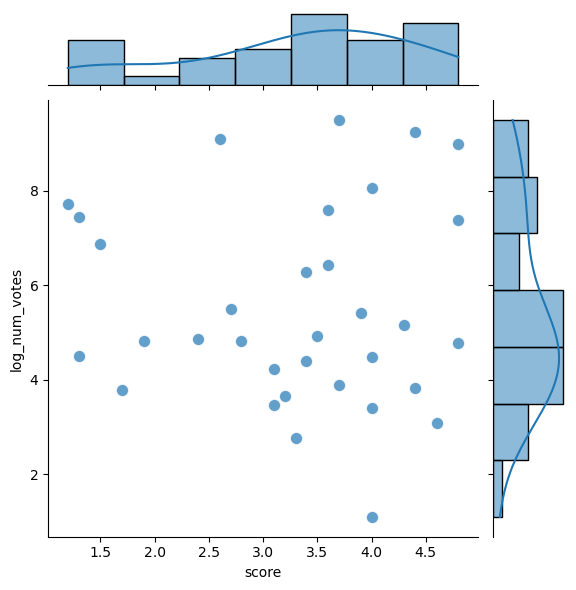

In [93]:
# plot score and num_votes with log transformation
g = sns.JointGrid(data=df1, y="log_num_votes", x="score")
g.plot_joint(sns.scatterplot, s=75, alpha=.7)
g.plot_marginals(sns.histplot, kde=True);

### Top 5 and Bottom 5 energy suppliers

Data Set 1

Show the top and bottom 5 energy suppliers according to their TRUST score and compare the number of votes.

In [95]:
##data
# sort data by score
data_score = data.sort_values("score", ascending=False)
# Identify outliers for
top_5 = data_score.head()
bottom_5 = data_score.tail()


In [96]:
top_5

,supplier,city,cat,score,num_votes,energy,eco,solar,heat,gas,fuel,water,telco,energy_solutions,virtual
0,Octopus Energy Germany,München,Ökostromanbieter Energieanbieter Stromversorgu...,4.8,8042,1,1,0,0,1,0,0,0,0,0
1,Ostrom,Berlin,Energieanbieter Ökostromanbieter Stromversorgu...,4.8,1598,1,1,1,0,0,0,0,0,0,0
8,pricewise.de,Heidelberg,Gasversorgungsunternehmen Stromversorgungsunte...,4.8,119,1,0,0,0,1,0,0,0,0,0
9,DFM-Select GmbH,Metzingen,Anbieter von Elektronikbauteilen Technischer K...,4.6,22,1,0,0,0,0,0,0,0,1,0
10,Vattenfall Europe Sales GmbH,Berlin,Stromversorgungsunternehmen Gasversorgungsunte...,4.4,10204,1,0,0,0,1,0,0,0,0,0


/tmp/ipykernel_1590/3392200518.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


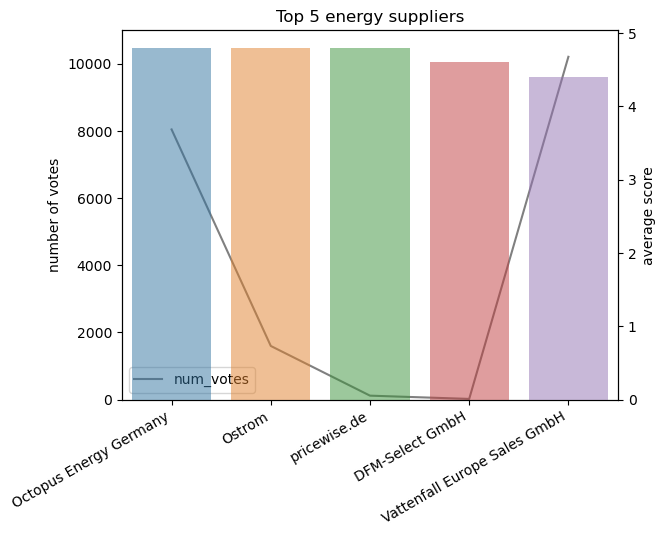

In [97]:
#plot of top 5 energy suppliers

# plot line graph on axis #1 = number of votes
ax1 = sns.lineplot(
    x= top_5.supplier, 
    y= top_5.num_votes, 
    color='grey'
)
ax1.set(xlabel=None)  # remove the x-axis label
ax1.set_ylabel('number of votes')
ax1.set_ylim(0, 11000)
ax1.set_title('Top 5 energy suppliers', fontsize= 12)
ax1.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar graph on axis #2 = score
sns.barplot(
    x= top_5.supplier, 
    y= top_5.score, 
    alpha= 0.5,
    #ax= axes[0],  
    ax = ax2       # Pre-existing axes for the plot
)

ax2.set_ylabel('average score')
ax1.legend(['num_votes'], loc="lower left")
plt.show()


Observation

 - The number of votes between the top 5 suppliers varies immensely from over 10,000 to two- and three digit numbers.
 - The TrustPilot Rating does not differentiate between suppliers with high or low number of votes for their ranking system.
 


In [99]:
bottom_5

,supplier,city,cat,score,num_votes,energy,eco,solar,heat,gas,fuel,water,telco,energy_solutions,virtual
28,Oekostrom,Düsseldorf,Gasversorgungsunternehmen Stromversorgungsunte...,1.7,44,1,0,0,0,1,0,0,0,0,0
29,MEP Werke,Eckernförde,Stromversorgungsunternehmen,1.5,961,1,0,0,0,0,0,0,0,0,0
30,LichtBlick,Hamburg,Stromversorgungsunternehmen Energieanbieter Ök...,1.3,1708,1,1,0,1,0,0,0,0,0,0
31,RWE,Essen,Stromversorgungsunternehmen,1.3,90,1,0,0,0,0,0,0,0,0,0
32,EWE,Oldenburg,Stromversorgungsunternehmen,1.2,2228,1,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_1590/3090941601.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


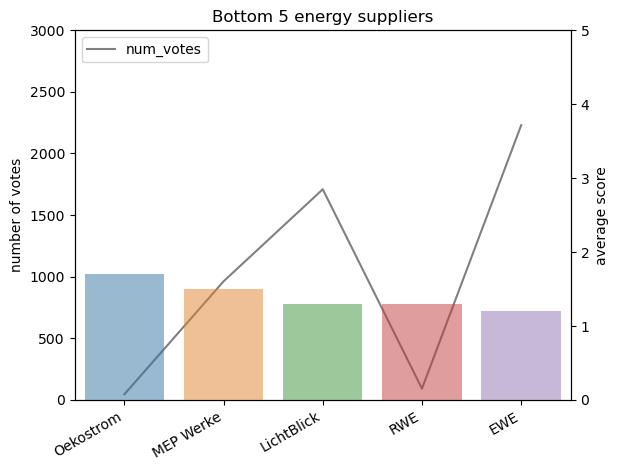

In [100]:
#plot of bottom 5 energy suppliers
# plot line graph on axis #1 = number of votes
ax1 = sns.lineplot(
    x= bottom_5.supplier, 
    y= bottom_5.num_votes, 
    color='grey'
)
ax1.set(xlabel=None)  # remove the x-axis label
ax1.set_ylabel('number of votes')
ax1.set_ylim(0, 3000)
ax1.set_title('Bottom 5 energy suppliers', fontsize= 12)
ax1.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar graph on axis #2 = score
sns.barplot(
    x= bottom_5.supplier, 
    y= bottom_5.score, 
    alpha= 0.5,
    #ax= axes[0],  
    ax = ax2       # Pre-existing axes for the plot
)

ax2.set_ylabel('average score')
ax2.set_ylim(0, 5)
ax1.legend(['num_votes'], loc="upper left")
plt.show()


Observation:

 - The situation is the same for the bottom 5 energy suppliers.
 - Only the average score is the deciding factor for the rating.

### Multiple services

Data set 1 The situation is the same for the bottom 5 energy suppliers. 
 
The visualization will present key categories and explore, if there is an impact of diversification on the success of the supplier.


#### Impact of eco power offering on score and number of votes

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


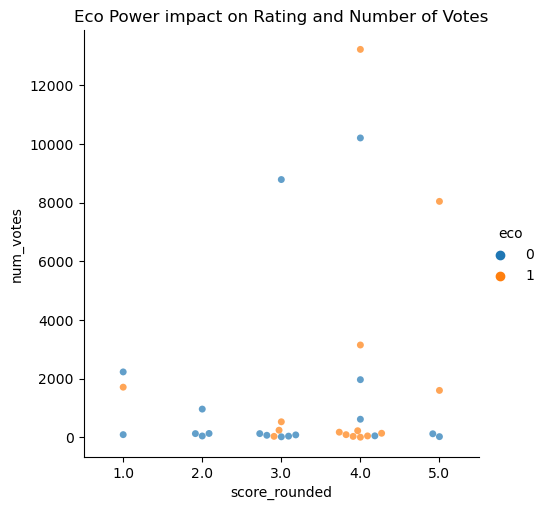

In [104]:
# data = ener_service (with categorized score)
# display the impact of eco power offering on score and number of votes
sns.catplot(x= 'score_rounded', 
            y= 'num_votes', 
            kind= 'swarm', 
            hue = 'eco', 
            alpha = 0.7,
            data = ener_service
           )

plt.title('Eco Power impact on Rating and Number of Votes')
plt.show()




#### Distribution and Relationship between eco power and gas offering

In [106]:
### modify data for FacetGrid
data_pg = ener_service
# create new column 'services'
data_pg['services'] = 'none'

# add entry to 'services' column when keyword present in source column
#  add 1 for 'telco' telecommunication services
data_pg.loc[data_pg["telco"] == 1, "services"] = 'telco'

# add 2 for 'energy_solutions', i.e. energy system construction or related services
data_pg.loc[data_pg["energy_solutions"] == 1, "services"] = 'energy_systems'

# drop obsolete columns 'telco' and 'energy_solutions'
data_pg = data_pg.drop(['telco', 'energy_solutions'], axis=1)


In [107]:
data_pg.head()

,supplier,city,eco,gas,num_votes,score,score_rounded,log_num_votes,services
0,Octopus Energy Germany,München,1,1,8042,4.8,5.0,8.992433,none
1,Ostrom,Berlin,1,0,1598,4.8,5.0,7.376508,none
2,Rabot Charge,Hamburg,1,0,174,4.3,4.0,5.159055,none
3,MONTANA Group,Grünwald,1,1,3146,4.0,4.0,8.053887,none
4,E.ON Energie Deutschland GmbH,München,1,1,13223,3.7,4.0,9.489713,energy_systems


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


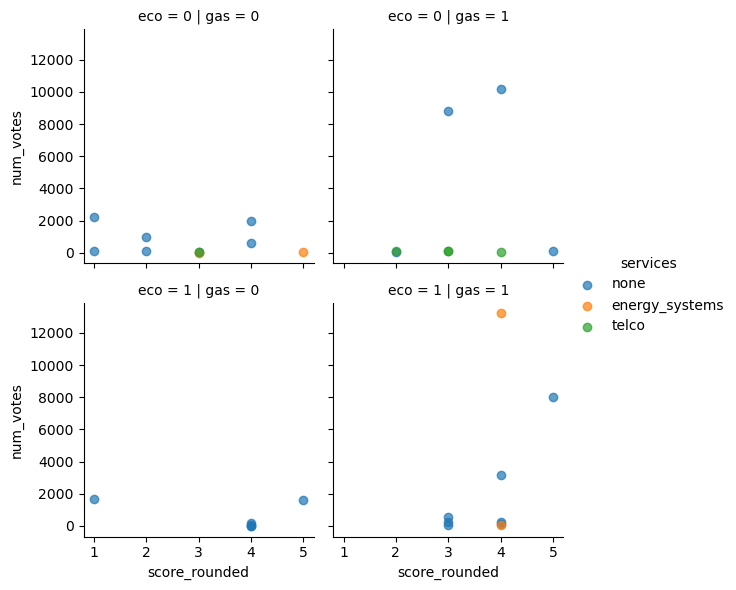

In [108]:
# Distribution and Relationship between eco power and gas offering
g = sns.FacetGrid(data= data_pg, 
                  col= 'gas',
                  row= 'eco',
                 hue= 'services')
g.map(plt.scatter, 'score_rounded', 'num_votes', alpha= 0.7)
g.add_legend()
plt.show()

Interpretation:
    
 - The offering of eco power is no guarantee for many (postive) replies or a high rating.
 - However, suppliers who are also offering gas, tend to have more votes but are distribute over scores 2 to 5.
 - In the overall ranking, telecommunication has no impact, but suppliers offering also energy systems like pv tend to have higher ranking.
 - Could this be an indication, that functioning business processes and customer orientation are the most important factors for a good score?

We should analyze the comments for feedback.

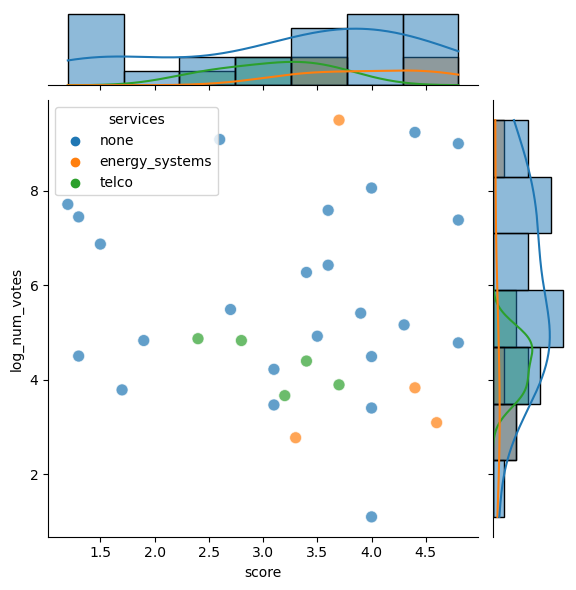

In [110]:
# plot score and num_votes with log transformation

g = sns.JointGrid(data=df1, y="log_num_votes", x="score", hue='services')
g.plot_joint(sns.scatterplot, s=75, alpha=0.7)
g.plot_marginals(sns.histplot, kde=True);


## Further Ideas - for later

### Most common words for positive and negative customer feedback --> later

Data set 2

Apply text mining on customer feedback comments and investigate, which key words are most common for positive and negative ratings. This could be in form of a word cloud and/or as a bar chart.


### Originality of supplier feedback --> later

Data set 2

Generic response vs. working with standard clauses. Are there standard phrases used for specific customer responses?